In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and Visualize the data

* Download
* load
* Visualize 
* Normalize

In [2]:
X = pd.read_csv('Linear_X_Train.csv')
Y = pd.read_csv('Linear_Y_Train.csv')

In [3]:
type(X)

pandas.core.frame.DataFrame

In [3]:
print(X.shape,Y.shape)

(3750, 1) (3750, 1)


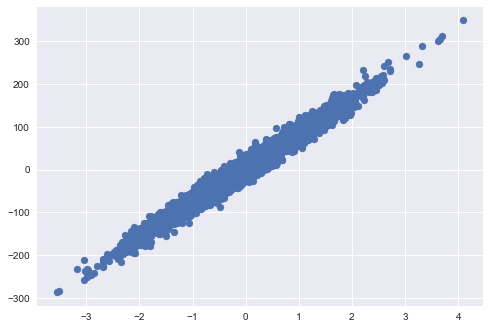

In [4]:
plt.style.use('seaborn')
plt.scatter(X,Y)

In [4]:
X = X.values
Y = Y.values

In [5]:
type(X)

numpy.ndarray

In [6]:
X

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

In [6]:
# Normalize

u = X.mean()
std = X.std()
print(u,std)
X =  ( X - u ) / std

-0.03779466168006854 0.9920801322508517


Text(0, 0.5, 'Performance')

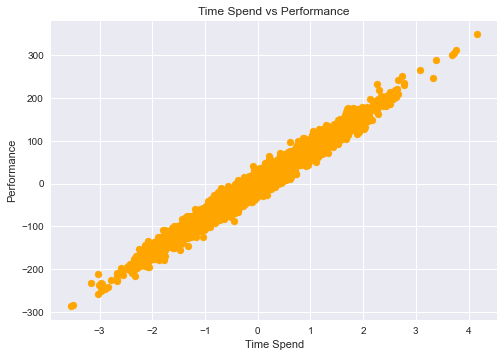

In [7]:
# Visualization

plt.style.use('seaborn')
plt.scatter(X,Y,color = 'orange')
plt.title('Time Spend vs Performance')
plt.xlabel('Time Spend')
plt.ylabel('Performance')

# <u> Linear Regression </u>

In [8]:
def hypothesis(x , theta) :
    # theta = [theta0 , theta1]
    y_ = theta[0] +theta[1]*x
    return y_ 


In [9]:
def gradient(X,Y,theta) :
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range (m) :
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*X[i]
        
    return grad/m

In [10]:
def error(X,Y,theta) :
    m = X.shape[0]
    total_error = 0.0
    for i in range (m) :
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m

In [11]:
def gradientDescent(X,Y,max_steps = 100 ,learning_rate = 0.1) :
    theta = np.zeros((2,))
    error_list = []
    for i in range (max_steps) :
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
    
    return theta,error_list

In [12]:
theta,error_list = gradientDescent(X,Y)

In [13]:
theta

array([ 0.6838508 , 79.90361453])

In [14]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

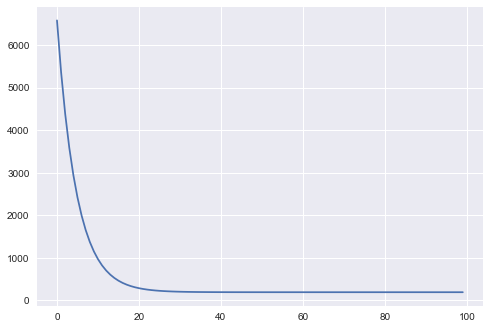

In [15]:
plt.plot(error_list)

## Predictions and Best line 

In [16]:
y_ = hypothesis(X,theta)

In [17]:
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

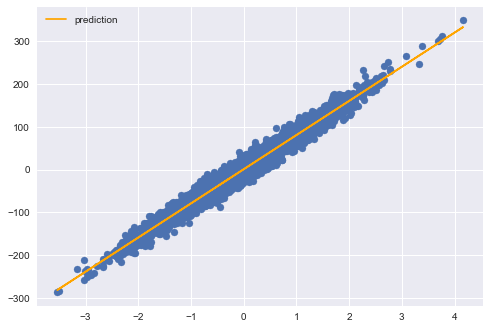

In [18]:
plt.scatter(X,Y)
plt.plot(X,y_ ,color='orange',label='prediction')
plt.legend()
plt.show()

In [19]:
# Test data
X_test = pd.read_csv('Linear_X_Test.csv')
Y_test = hypothesis(X_test,theta)
Y_test.shape

(1250, 1)

In [20]:
Y_test

,x
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [25]:
type(Y_test)

pandas.core.frame.DataFrame

In [26]:
Y_test.columns = ['y']

In [27]:
Y_test

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [28]:
Y_test.to_csv('Test Result.csv',index=False)

## Computing Score

* Score : R2(R-Squared) or Coefficient of Detemination

In [29]:
def r2_score(Y , Y_) :
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    
    score = 1 - num/denom
    return score*100

In [30]:
r2_score(Y,y_)

97.09612226971643

In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)

In [23]:
T0 ,T1 = np.meshgrid(T0,T1)

In [24]:
j = np.zeros(T0.shape)

In [26]:
for i in range (j.shape[0]) :
    for j in range (j.shape[1]) :
        y_ = T1[i,j]*X + T0[i,j]
        j[i,j] = np.sum((Y - y_)**2)
        
print(j)

AttributeError: 'int' object has no attribute 'shape'